In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [36]:
# load data
raw_data = pd.read_csv("Tractores_Matriculados.csv")
print(raw_data.head(), "\n")  # check data structure
print(raw_data.dtypes)  # check data types

        Fecha  Tractores
0  1986-01-31     1965.0
1  1986-02-28     1467.0
2  1986-03-31     1106.0
3  1986-04-30     1460.0
4  1986-05-31     1563.0 

Fecha         object
Tractores    float64
dtype: object


Fecha        datetime64[ns]
Tractores           float64
dtype: object


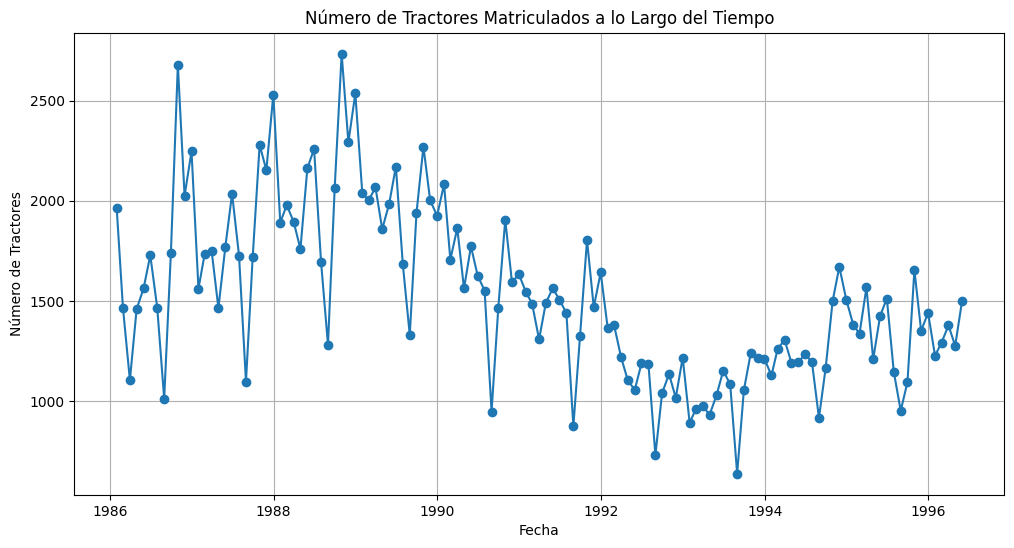

In [37]:
raw_data["Fecha"] = pd.to_datetime(
    raw_data["Fecha"], yearfirst=True
)  # convert to datetime object taking into account the year is first

print(raw_data.dtypes)  # check data types

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(raw_data["Fecha"], raw_data["Tractores"], marker="o")
plt.title("Número de Tractores Matriculados a lo Largo del Tiempo")
plt.xlabel("Fecha")
plt.ylabel("Número de Tractores")
plt.grid(True)
plt.show()

### Statistics

In [38]:
print(raw_data.describe(), "\n")  # summary statistics
print(raw_data.isna())  # check for missing values

"""
we can use raw_data.Fecha.descibe() to get a summary of the date column
"""

"""  
we can see in a specific column if there are missing values with: 
raw_data['column_name'].isna().sum()

If we want to fill the missing values with smth (in this case with the previus value) we can use:
raw_data.Tractores = raw_data.Tractores.fillna(
    method="ffill"
)
"""

                               Fecha    Tractores
count                            132   125.000000
mean   1991-07-16 06:10:54.545454592  1531.120000
min              1986-01-31 00:00:00   639.000000
25%              1988-10-23 06:00:00  1210.000000
50%              1991-07-15 12:00:00  1487.000000
75%              1994-04-07 12:00:00  1773.000000
max              1996-12-31 00:00:00  2734.000000
std                              NaN   425.232889 

     Fecha  Tractores
0    False      False
1    False      False
2    False      False
3    False      False
4    False      False
..     ...        ...
127  False       True
128  False       True
129  False       True
130  False       True
131  False       True

[132 rows x 2 columns]


'  \nwe can see in a specific column if there are missing values with: \nraw_data[\'column_name\'].isna().sum()\n\nIf we want to fill the missing values with smth (in this case with the previus value) we can use:\nraw_data.Tractores = raw_data.Tractores.fillna(\n    method="ffill"\n)\n'

In [39]:
# Filter data between 1988 t 1994
data = raw_data[
    (raw_data.Fecha >= "1986-01-31 00:00:00")
    & (raw_data.Fecha <= "1995-12-31 00:00:00")
]

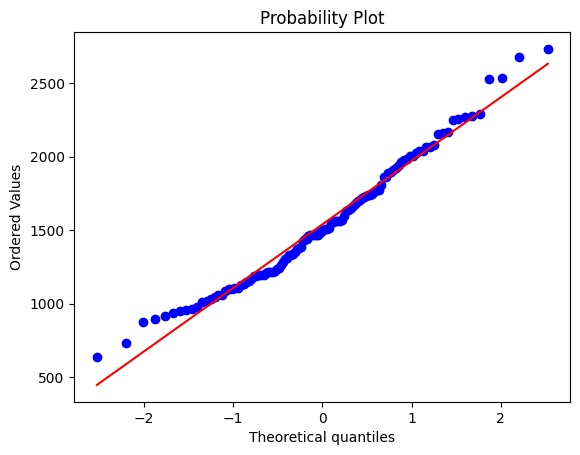

In [40]:
import pylab

# Check for normality
stats.probplot(data.Tractores, dist="norm", plot=pylab)
pylab.show()

In [41]:
data.head()

,Fecha,Tractores
0,1986-01-31,1965.0
1,1986-02-28,1467.0
2,1986-03-31,1106.0
3,1986-04-30,1460.0
4,1986-05-31,1563.0


In [42]:
# Set date as index column and sort by date
data.set_index("Fecha", inplace=True)
data.head()

,Tractores
Fecha,
1986-01-31,1965.0
1986-02-28,1467.0
1986-03-31,1106.0
1986-04-30,1460.0
1986-05-31,1563.0


In [43]:
# data = data.asfreq("m")  # set frequency to monthly data
# data.head(50)

"""No funciona, no se puede convertir a frecuencia mensual -- da error"""

'No funciona, no se puede convertir a frecuencia mensual -- da error'

In [44]:
"""For delete column: 
del data['Tractores']

For add column for example: 
data['name new column'] = data['Tractores'] # copy the column Tractores to the new column
"""

"For delete column: \ndel data['Tractores']\n\nFor add column for example: \ndata['name new column'] = data['Tractores'] # copy the column Tractores to the new column\n"

### Split information in training set (80% data) and test set (20% data)

In [45]:
# size_train = int(len(data) * 0.8)

# train = data.iloc[:size_train]
# test = data.iloc[size_train:]

# test.head()

#### White noise

In [46]:
# WN = np.random.normal(
#     loc=train.Tractores.mean(), scale=train.Tractores.std(), size=len(train)
# )  # create white noise for comparison

# train["WN"] = WN  # add white noise to data
# train.describe()  # for check the values

In [47]:
# # add addfuller
# import statsmodels.tsa.stattools as sts

# sts.adfuller(train.Tractores)

## Determinamos si el modelo es aditivo o multiplicativo

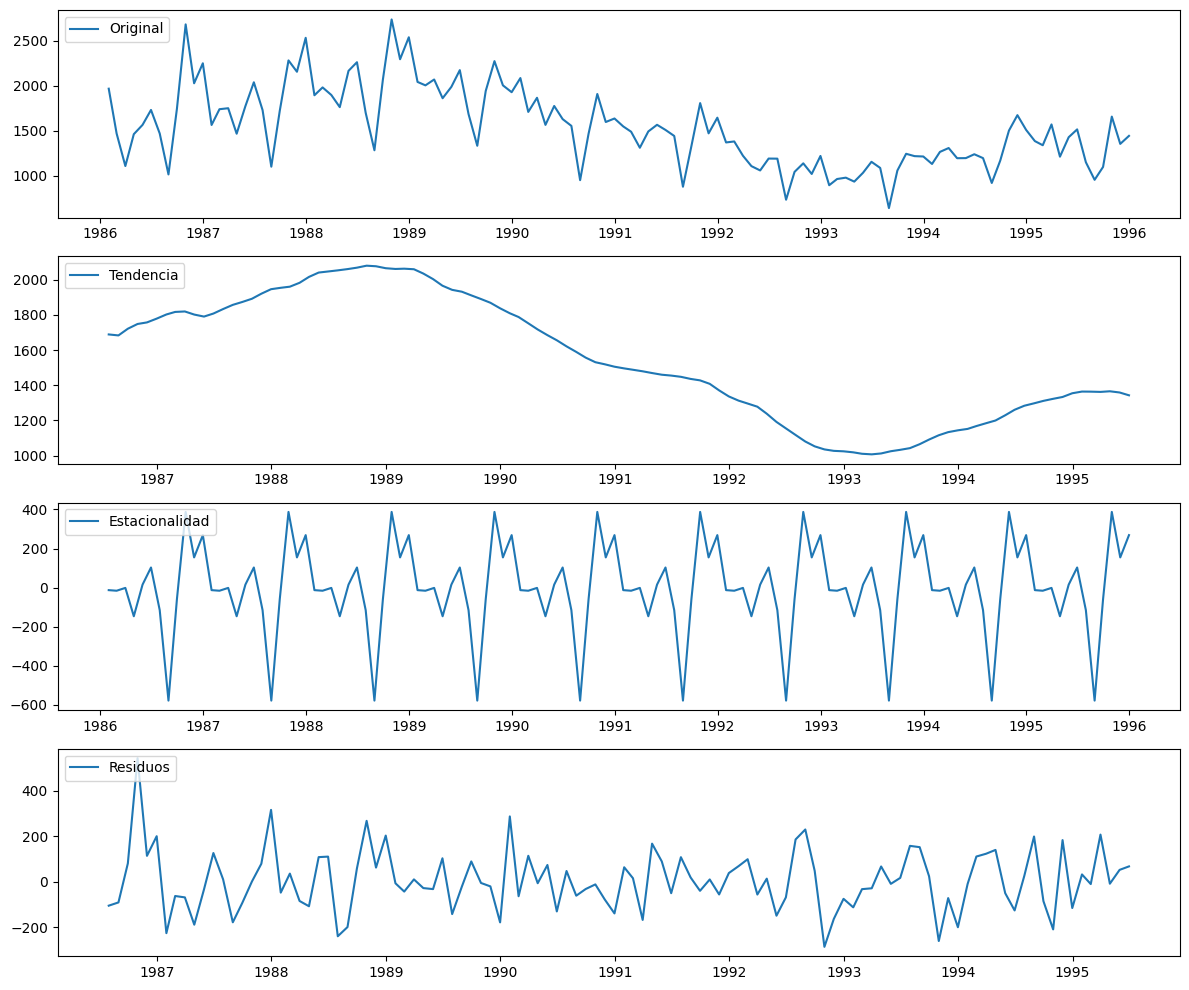

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Realizar la descomposición aditiva con los datos interpolados
decomposition_add = seasonal_decompose(data["Tractores"], model="additive", period=12)

# Graficar la descomposición aditiva
plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(data["Tractores"], label="Original")
plt.legend(loc="upper left")

plt.subplot(412)
plt.plot(decomposition_add.trend, label="Tendencia")
plt.legend(loc="upper left")

plt.subplot(413)
plt.plot(decomposition_add.seasonal, label="Estacionalidad")
plt.legend(loc="upper left")

plt.subplot(414)
plt.plot(decomposition_add.resid, label="Residuos")
plt.legend(loc="upper left")

plt.tight_layout()
plt.show()

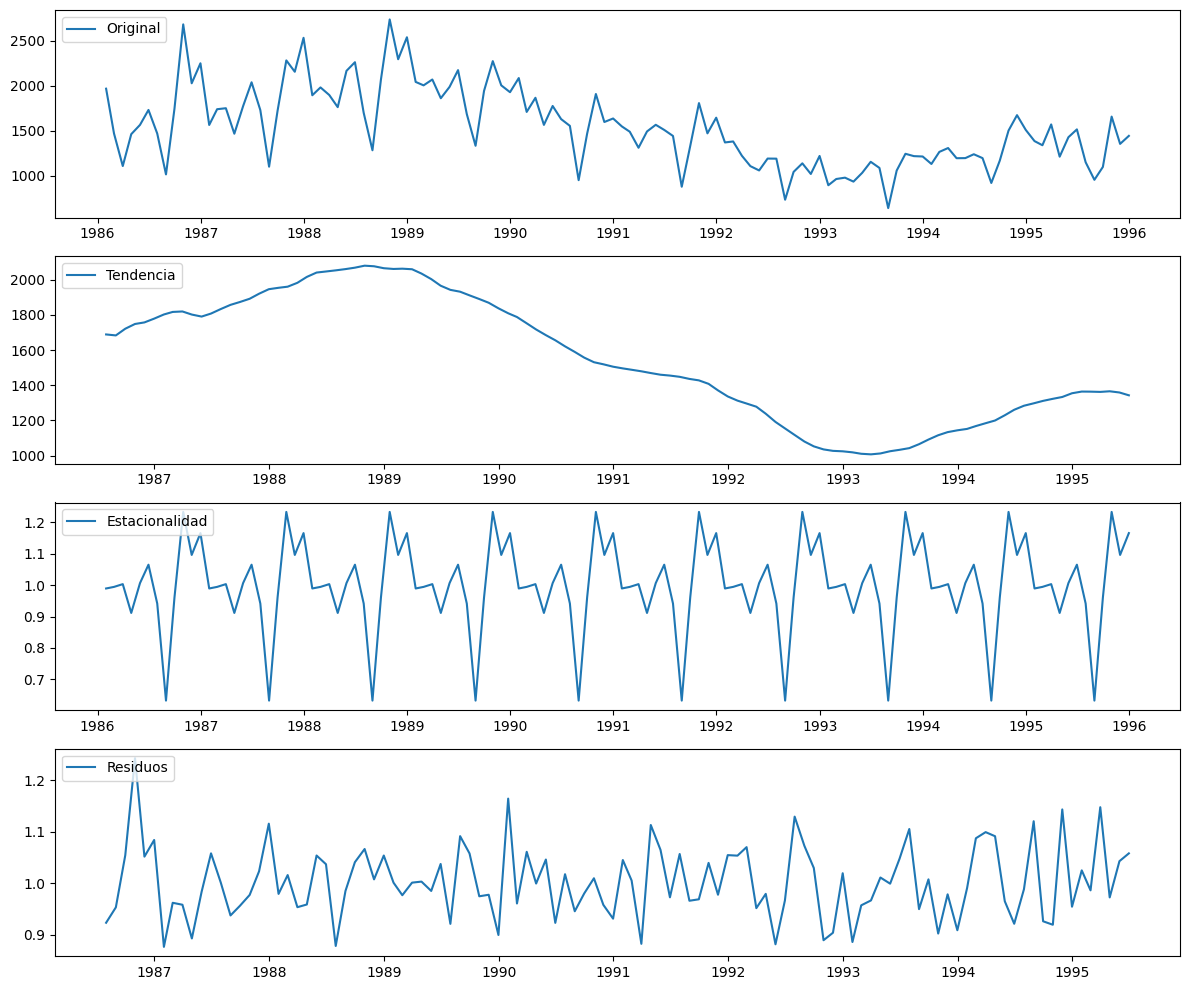

In [49]:
# Realizar la descomposición multiplicativa con los datos interpolados
decomposition_mult = seasonal_decompose(
    data["Tractores"], model="multiplicative", period=12
)

# Graficar la descomposición multiplicativa
plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(data["Tractores"], label="Original")
plt.legend(loc="upper left")

plt.subplot(412)
plt.plot(decomposition_mult.trend, label="Tendencia")
plt.legend(loc="upper left")

plt.subplot(413)
plt.plot(decomposition_mult.seasonal, label="Estacionalidad")
plt.legend(loc="upper left")

plt.subplot(414)
plt.plot(decomposition_mult.resid, label="Residuos")
plt.legend(loc="upper left")

plt.tight_layout()
plt.show()

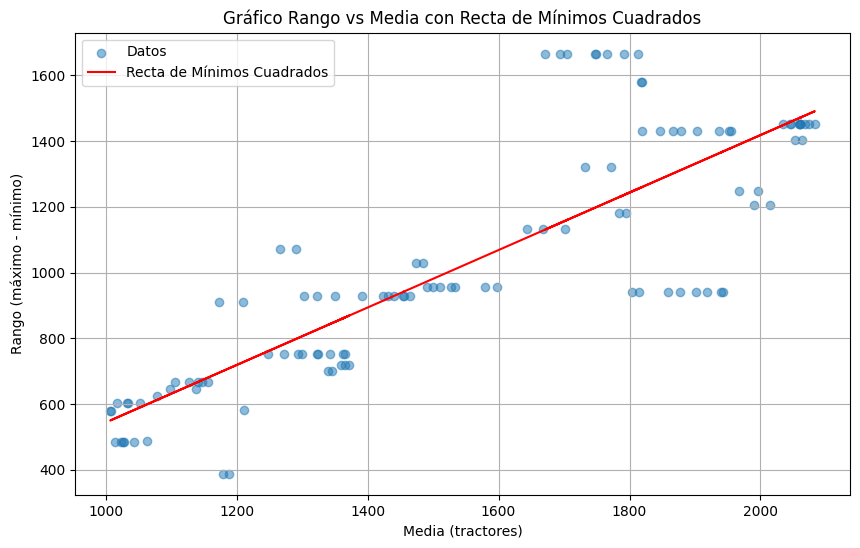

Coeficiente de determinación R^2: 0.7025104325971478
Pendiente de la recta: 0.8747235274572885
Intercepto de la recta: -330.9831230349863
Recta de mínimos cuadrados: y = 0.87x + -330.98

Podemos concluir con este y los anteriores gráficos que el mejor modelo que se ajusta es uno multiplicativo 


In [50]:
from sklearn.linear_model import LinearRegression

rolling_window = 12
rolling_mean = data["Tractores"].rolling(window=rolling_window).mean()
rolling_range = (
    data["Tractores"].rolling(window=rolling_window).apply(lambda x: x.max() - x.min())
)

# Eliminar NaN values resulted from rolling window operations
valid_idx = rolling_mean.dropna().index
valid_rolling_mean = rolling_mean.loc[valid_idx]
valid_rolling_range = rolling_range.loc[valid_idx]

# Reshape data for linear regression
X = valid_rolling_mean.values.reshape(-1, 1)
Y = valid_rolling_range.values

# Ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, Y)

# Predecir valores usando el modelo ajustado
y_pred = model.predict(X)

# Graficar el rango vs la media con la recta de mínimos cuadrados
plt.figure(figsize=(10, 6))
plt.scatter(valid_rolling_mean, valid_rolling_range, alpha=0.5, label="Datos")
plt.plot(valid_rolling_mean, y_pred, color="red", label="Recta de Mínimos Cuadrados")
plt.title("Gráfico Rango vs Media con Recta de Mínimos Cuadrados")
plt.xlabel("Media (tractores)")
plt.ylabel("Rango (máximo - mínimo)")
plt.legend()
plt.grid(True)
plt.show()

print(f"Coeficiente de determinación R^2: {model.score(X, y)}")
print(f"Pendiente de la recta: {model.coef_[0]}")
print(f"Intercepto de la recta: {model.intercept_}")
print(
    f"Recta de mínimos cuadrados: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}\n"
)

print(
    "Podemos concluir con este y los anteriores gráficos que el mejor modelo que se ajusta es uno multiplicativo "
)

Mejor lambda para Box-Cox: 0.26521762623669387

Un valor de lambda cercano a 0 sugiere una transformación logarítmica (indicando una estructura multiplicativa), sino es aditiva



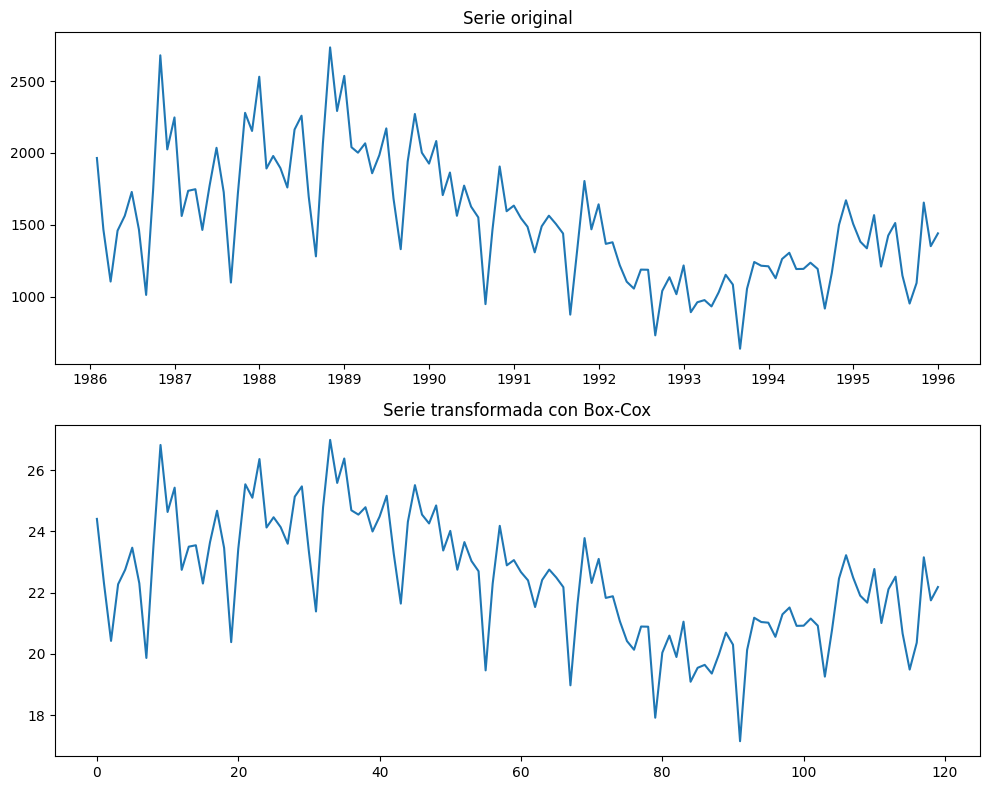

Con la transformación de Box-Cox, se logra una serie más estacionaria y con una estructura multiplicativa



' Dado que la transformación de Box-Cox ha logrado estabilizar la varianza y ha hecho que la serie transformada se vea más estacionaria, podemos concluir que la serie original probablemente tenga una estructura multiplicativa. Este tipo de estructura es común cuando las fluctuaciones en la serie están relacionadas con el nivel de la serie misma, es decir, los cambios son proporcionales al valor actual de la serie.'

In [51]:
transformed_data, best_lambda = stats.boxcox(data["Tractores"])

print(f"Mejor lambda para Box-Cox: {best_lambda}")
print(
    "\nUn valor de lambda cercano a 0 sugiere una transformación logarítmica (indicando una estructura multiplicativa), sino es aditiva\n"
)

fig, ax = plt.subplots(2, 1, figsize=(10, 8))

ax[0].plot(data["Tractores"])
ax[0].set_title("Serie original")

ax[1].plot(transformed_data)
ax[1].set_title("Serie transformada con Box-Cox")

plt.tight_layout()
plt.show()

print(
    "Con la transformación de Box-Cox, se logra una serie más estacionaria y con una estructura multiplicativa\n"
)

""" Dado que la transformación de Box-Cox ha logrado estabilizar la varianza y ha hecho que la serie transformada se vea más estacionaria, podemos concluir que la serie original probablemente tenga una estructura multiplicativa. Este tipo de estructura es común cuando las fluctuaciones en la serie están relacionadas con el nivel de la serie misma, es decir, los cambios son proporcionales al valor actual de la serie."""

#### Comprobamos la estacionalidad 

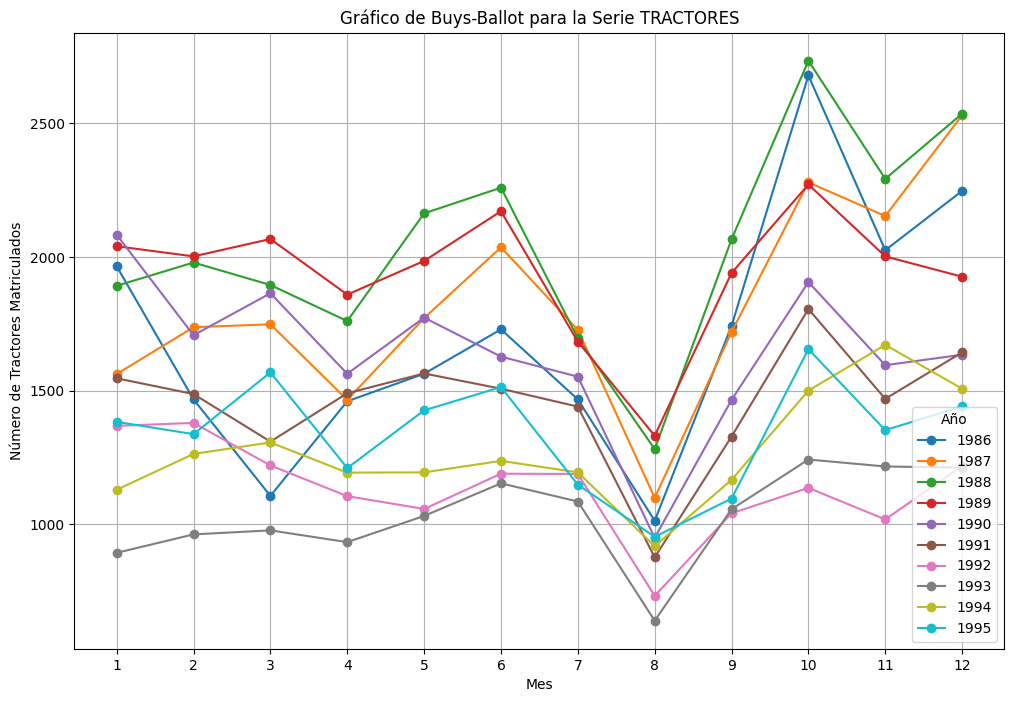

In [55]:
# Extraer el mes y el año de cada fecha
data.loc[:, "Month"] = data.index.month
data.loc[:, "Year"] = data.index.year

# Crear el gráfico de Buys-Ballot en el estilo solicitado
plt.figure(figsize=(12, 8))

# Graficar los datos por año
for year in data["Year"].unique():
    yearly_data = data[data["Year"] == year]
    plt.plot(
        yearly_data["Month"], yearly_data["Tractores"], marker="o", label=str(year)
    )

plt.title("Gráfico de Buys-Ballot para la Serie TRACTORES")
plt.xlabel("Mes")
plt.ylabel("Número de Tractores Matriculados")
plt.xticks(range(1, 13))
plt.legend(title="Año")
plt.grid(True)
plt.show()

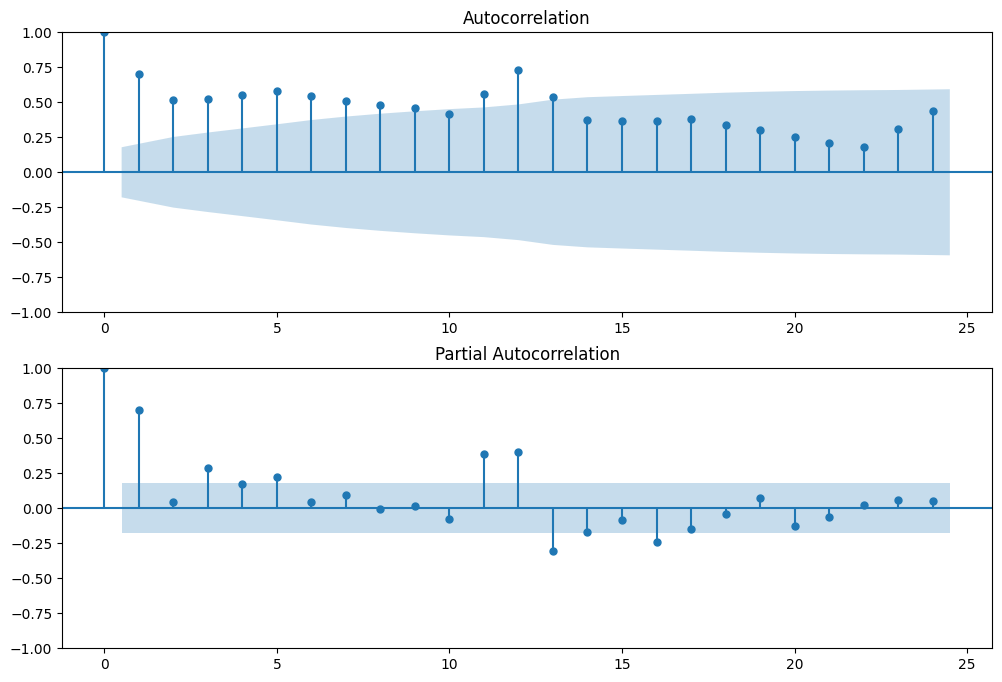

In [56]:
# ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(data["Tractores"], lags=24, ax=ax[0])
plot_pacf(data["Tractores"], lags=24, ax=ax[1])

plt.show()